In [113]:
pip install streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=222bf9e6652703671b2575c9965948a5082123a5e786e245d78503dd2fedcf84
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [114]:
import streamlit 

In [52]:

import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")
print(data.head())

           DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  \
0  01/11/2011 00:00    None            0          1          44    1     11   
1  01/11/2011 00:30    None            0          1          44    1     11   
2  01/11/2011 01:00    None            0          1          44    1     11   
3  01/11/2011 01:30    None            0          1          44    1     11   
4  01/11/2011 02:00    None            0          1          44    1     11   

   Year  PeriodOfDay ForecastWindProduction SystemLoadEA  SMPEA  \
0  2011            0                 315.31      3388.77  49.26   
1  2011            1                 321.80      3196.66  49.26   
2  2011            2                 328.57      3060.71  49.10   
3  2011            3                 335.60      2945.56  48.04   
4  2011            4                 342.90      2849.34  33.75   

  ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction SystemLoadEP2  \
0           6.00         9.30       600.7

<ipython-input-52-fab44446a969>:3: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37682 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                37682 non-null  object 
 1   Holiday                 37682 non-null  object 
 2   HolidayFlag             37682 non-null  int64  
 3   DayOfWeek               37682 non-null  int64  
 4   WeekOfYear              37682 non-null  int64  
 5   Day                     37682 non-null  int64  
 6   Month                   37682 non-null  int64  
 7   Year                    37682 non-null  int64  
 8   PeriodOfDay             37682 non-null  int64  
 9   ForecastWindProduction  37682 non-null  float64
 10  SystemLoadEA            37682 non-null  float64
 11  SMPEA                   37682 non-null  float64
 12  ORKTemperature          37682 non-null  float64
 13  ORKWindspeed            37682 non-null  float64
 14  CO2Intensity            37682 non-null

In [87]:

data["ForecastWindProduction"] = pd.to_numeric(data["ForecastWindProduction"], errors= 'coerce')
data["SystemLoadEA"] = pd.to_numeric(data["SystemLoadEA"], errors= 'coerce')
data["SMPEA"] = pd.to_numeric(data["SMPEA"], errors= 'coerce')
data["ORKTemperature"] = pd.to_numeric(data["ORKTemperature"], errors= 'coerce')
data["ORKWindspeed"] = pd.to_numeric(data["ORKWindspeed"], errors= 'coerce')
data["CO2Intensity"] = pd.to_numeric(data["CO2Intensity"], errors= 'coerce')
data["ActualWindProduction"] = pd.to_numeric(data["ActualWindProduction"], errors= 'coerce')
data["SystemLoadEP2"] = pd.to_numeric(data["SystemLoadEP2"], errors= 'coerce')
data["SMPEP2"] = pd.to_numeric(data["SMPEP2"], errors= 'coerce')


In [88]:
data.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [89]:
data = data.dropna()

<ipython-input-90-c51eeb38dbc7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr(method='pearson')


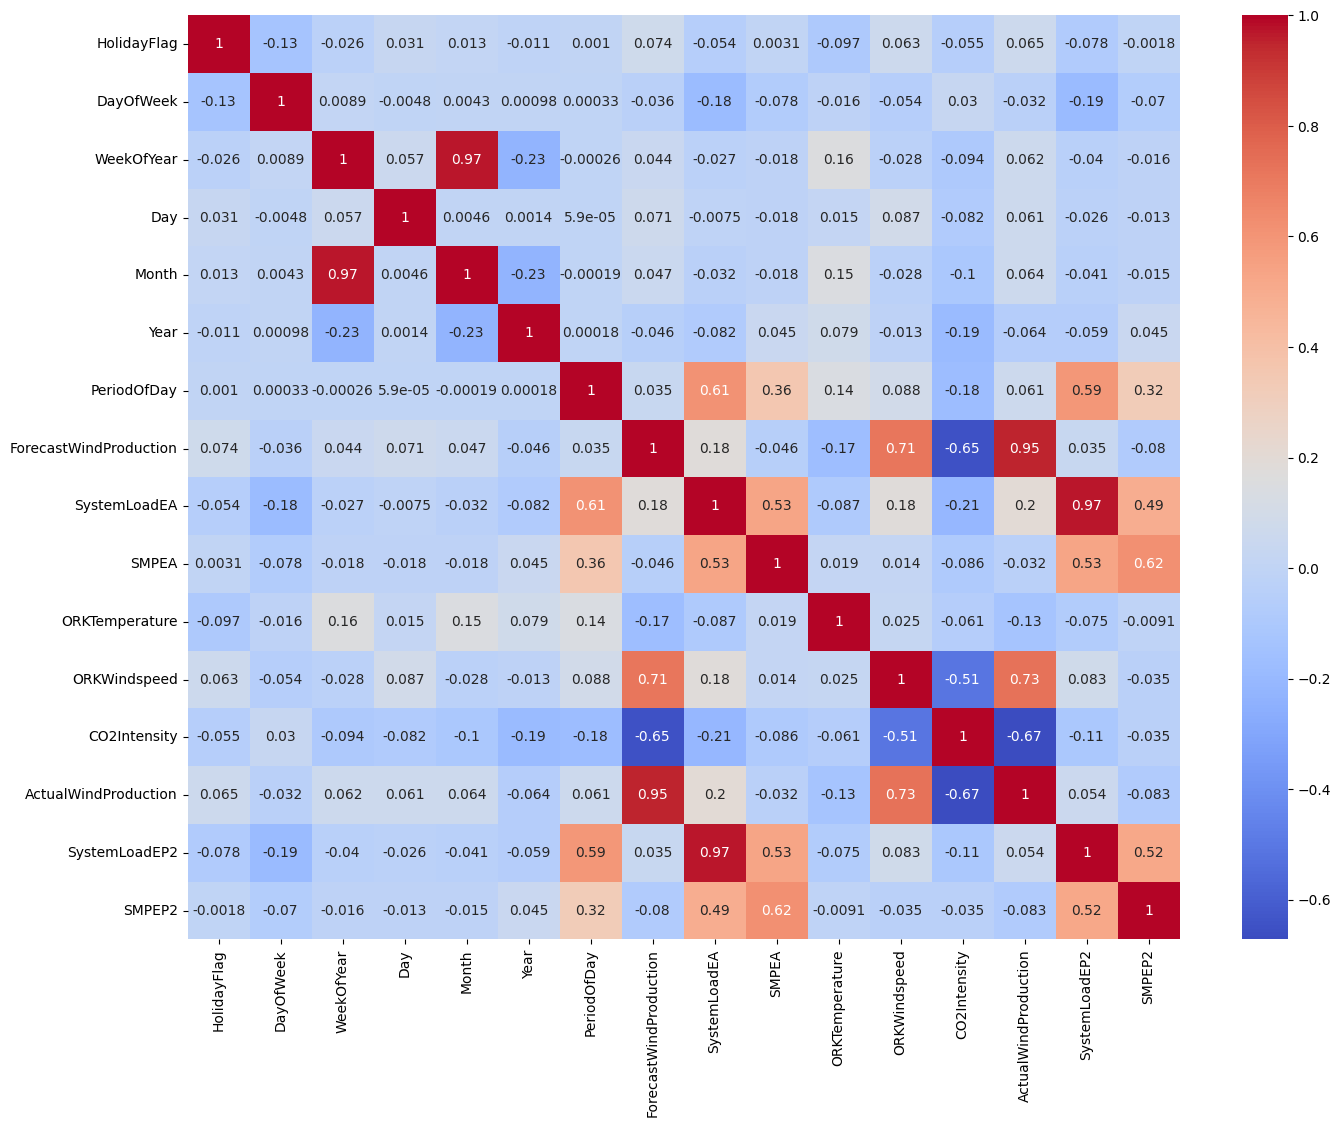

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
correlations = data.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [91]:
x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]
y = data["SMPEP2"]


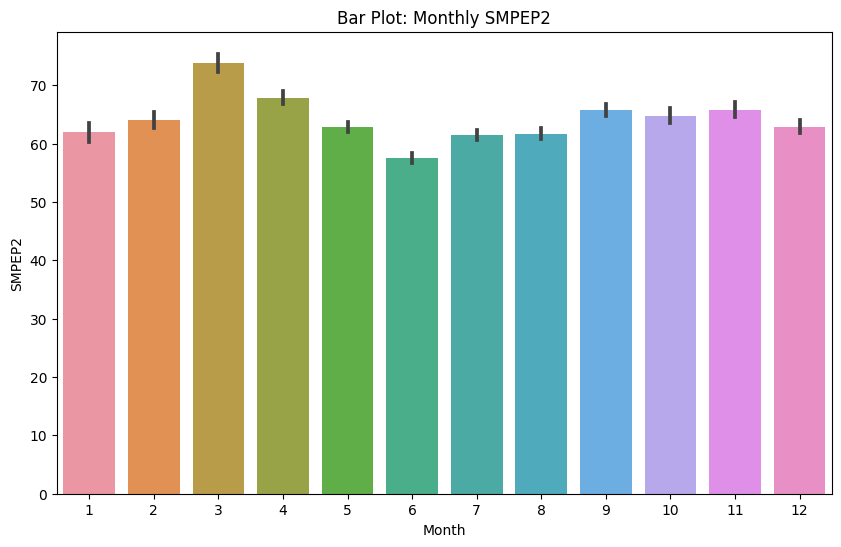

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

x = "Month"
y = "SMPEP2"

plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, data=data)
plt.xlabel("Month")
plt.ylabel("SMPEP2")
plt.title("Bar Plot: Monthly SMPEP2")
plt.show()


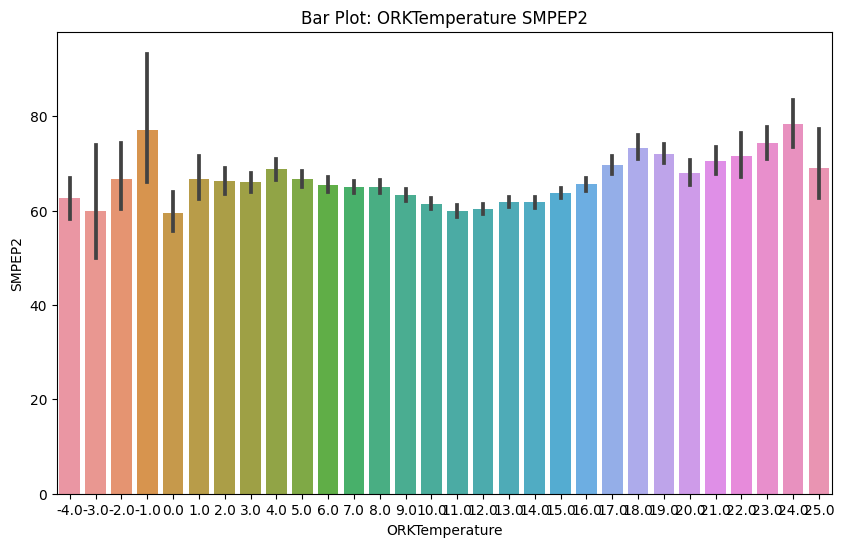

In [93]:

import matplotlib.pyplot as plt
import seaborn as sns

x = "ORKTemperature"
y = "SMPEP2"

plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, data=data)
plt.xlabel("ORKTemperature")
plt.ylabel("SMPEP2")
plt.title("Bar Plot: ORKTemperature SMPEP2")
plt.show()


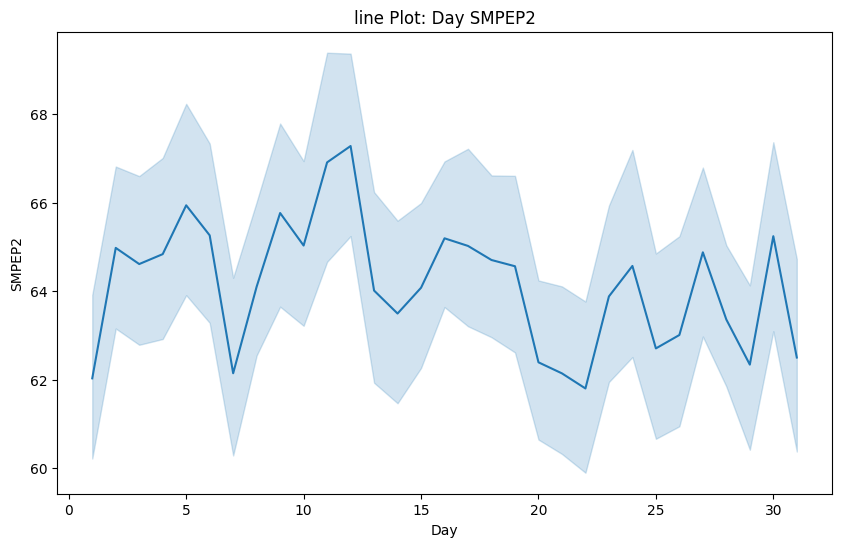

In [94]:

import matplotlib.pyplot as plt
import seaborn as sns

x = "Day"
y = "SMPEP2"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, data=data)
plt.xlabel("Day")
plt.ylabel("SMPEP2")
plt.title("line Plot: Day SMPEP2")
plt.show()

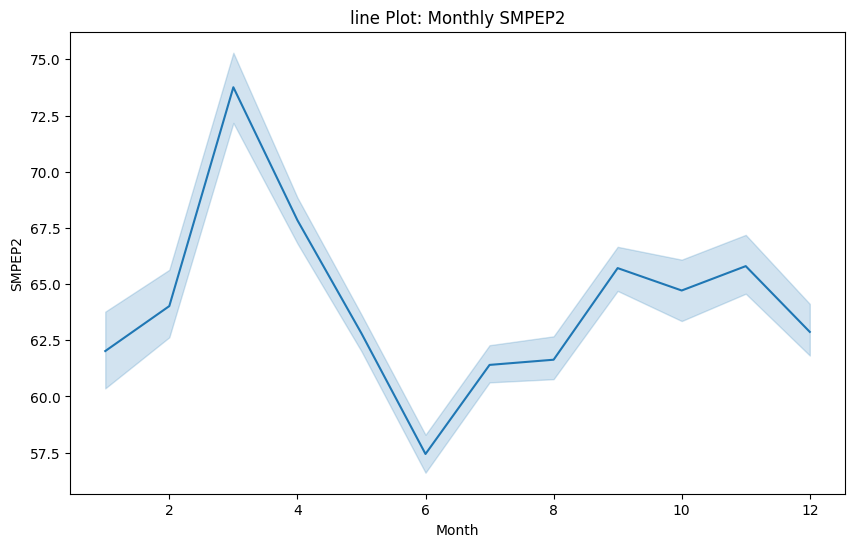

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

x = "Month"
y = "SMPEP2"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, data=data)
plt.xlabel("Month")
plt.ylabel("SMPEP2")
plt.title("line Plot: Monthly SMPEP2")
plt.show()

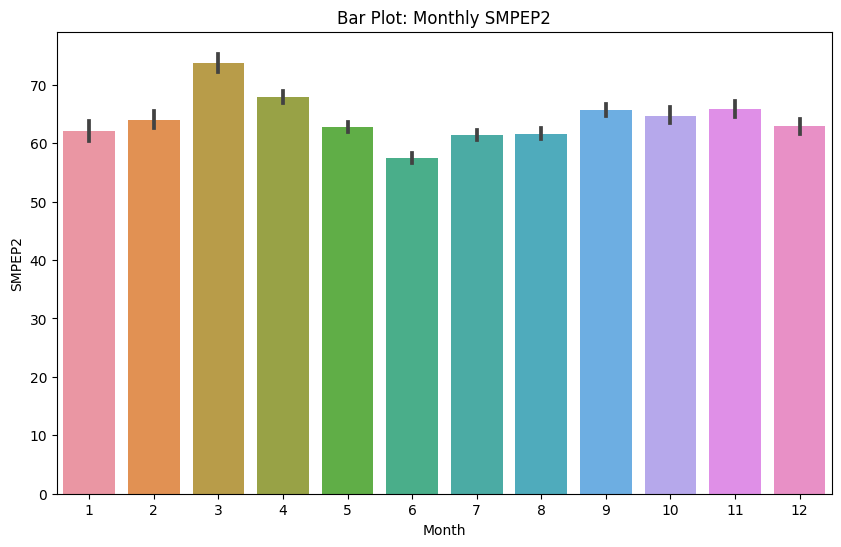

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

x = "Month"
y = "SMPEP2"

plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, data=data)
plt.xlabel("Month")
plt.ylabel("SMPEP2")
plt.title("Bar Plot: Monthly SMPEP2")
plt.show()


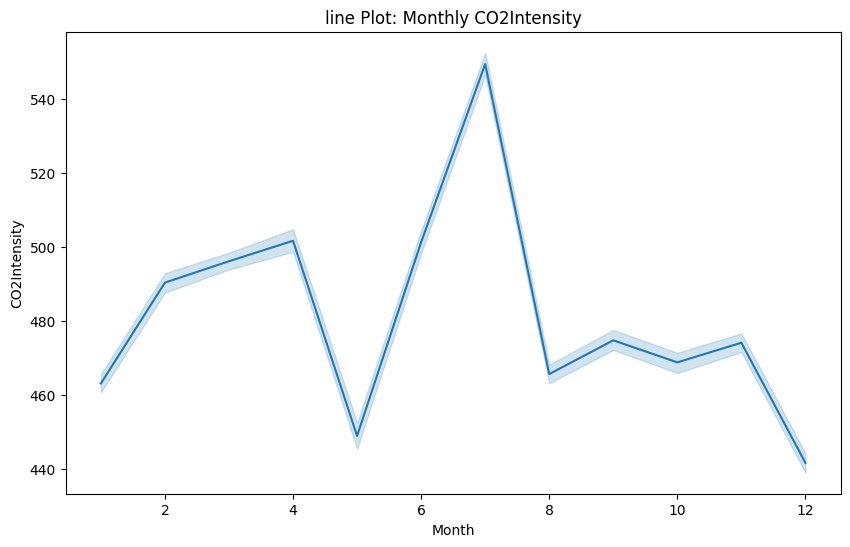

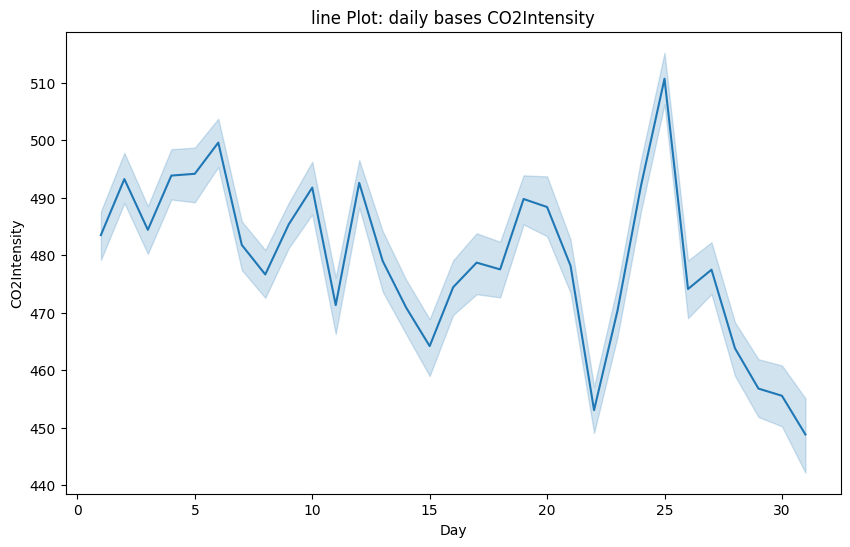

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

x = "Month"
y = "CO2Intensity"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, data=data)
plt.xlabel("Month")
plt.ylabel("CO2Intensity")
plt.title("line Plot: Monthly CO2Intensity")
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

x = "Day"
y = "CO2Intensity"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, data=data)
plt.xlabel("Day")
plt.ylabel("CO2Intensity")
plt.title("line Plot: daily bases CO2Intensity")
plt.show()

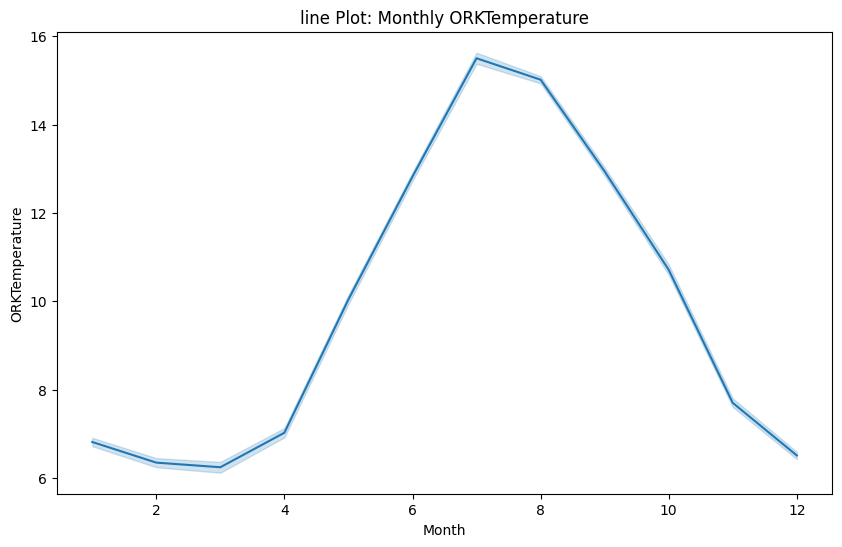

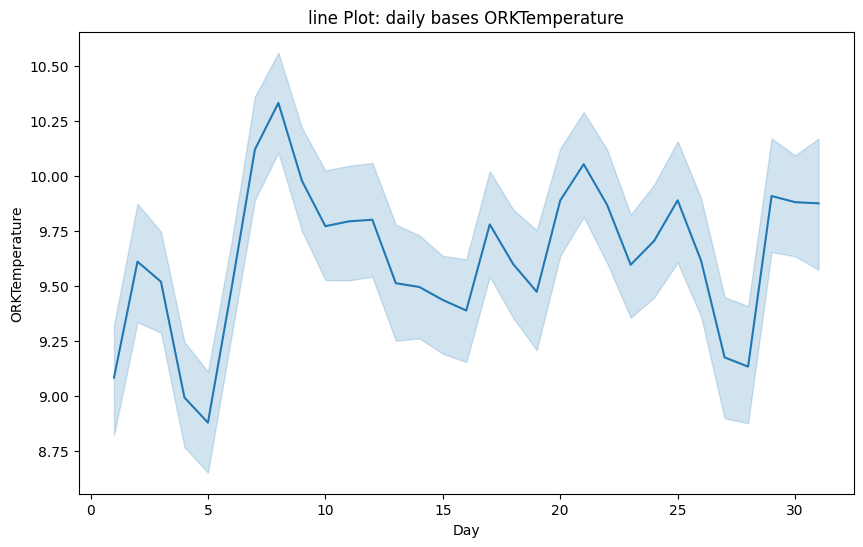

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

x = "Month"
y = "ORKTemperature"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, data=data)
plt.xlabel("Month")
plt.ylabel("ORKTemperature")
plt.title("line Plot: Monthly ORKTemperature")
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

x = "Day"
y = "ORKTemperature"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, data=data)
plt.xlabel("Day")
plt.ylabel("ORKTemperature")
plt.title("line Plot: daily bases ORKTemperature")
plt.show()

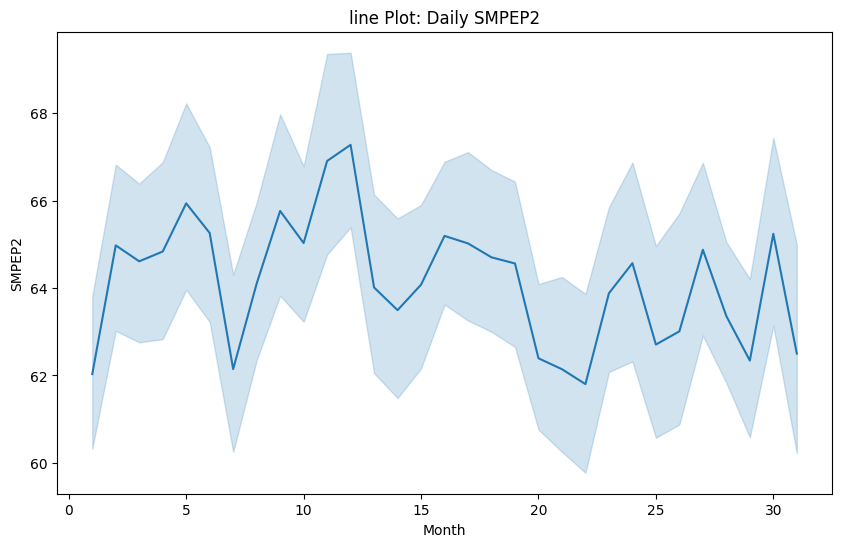

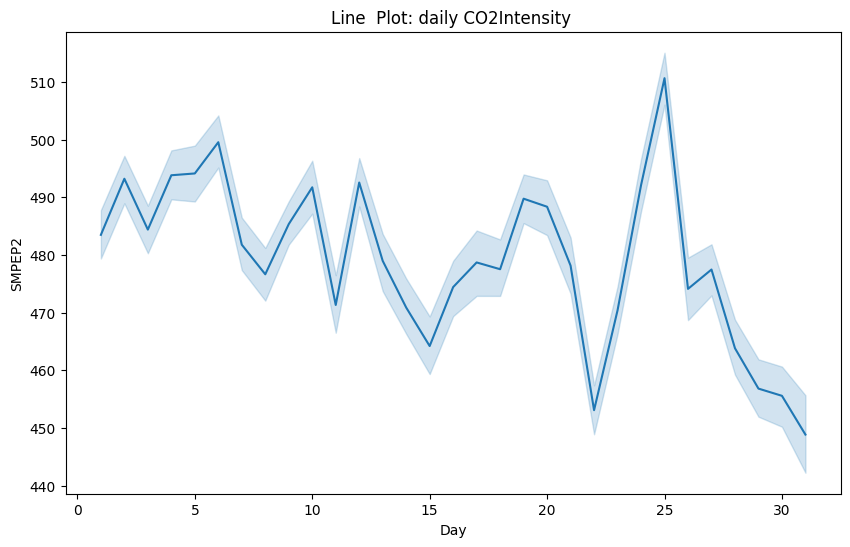

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

x = "Day"
y = "SMPEP2"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, data=data)
plt.xlabel("Month")
plt.ylabel("SMPEP2")
plt.title("line Plot: Daily SMPEP2")
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

x = "Day"
y = "CO2Intensity"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, data=data)
plt.xlabel("Day")
plt.ylabel("SMPEP2")
plt.title("Line  Plot: daily CO2Intensity ")
plt.show()

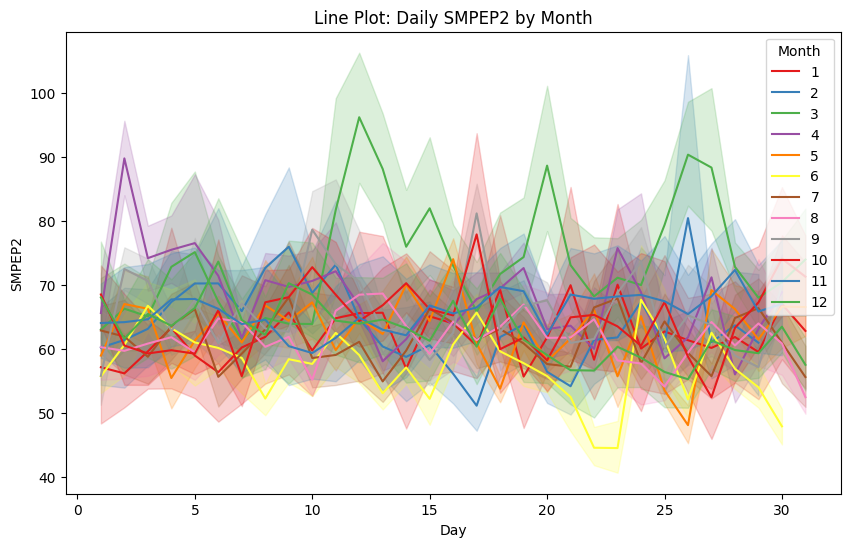

In [100]:

import matplotlib.pyplot as plt
import seaborn as sns

x = "Day"
y = "SMPEP2"
hue = "Month"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, hue=hue, data=data,  palette="Set1")
plt.xlabel("Day")
plt.ylabel("SMPEP2")
plt.title("Line Plot: Daily SMPEP2 by Month")
plt.legend(title="Month", loc="upper right")
plt.show()


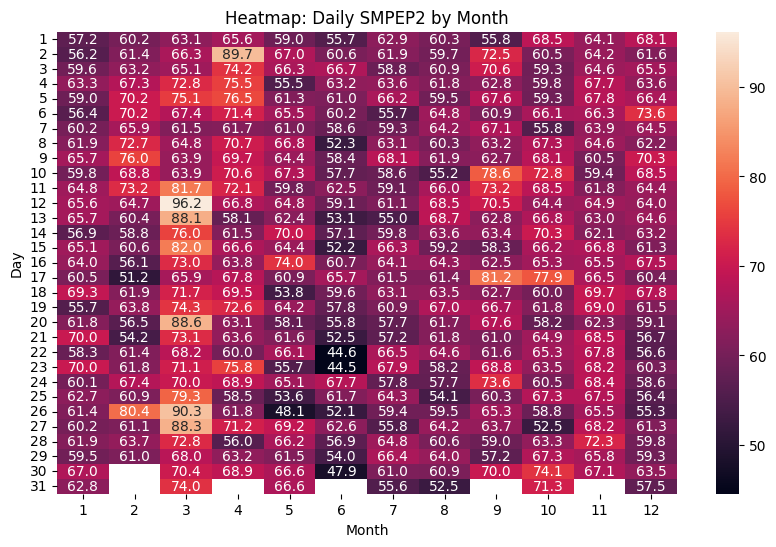

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

data_pivot = data.pivot_table(index="Day", columns="Month", values="SMPEP2")

plt.figure(figsize=(10, 6))
sns.heatmap(data_pivot, annot=True, fmt=".1f")
plt.xlabel("Month")
plt.ylabel("Day")
plt.title("Heatmap: Daily SMPEP2 by Month")
plt.show()

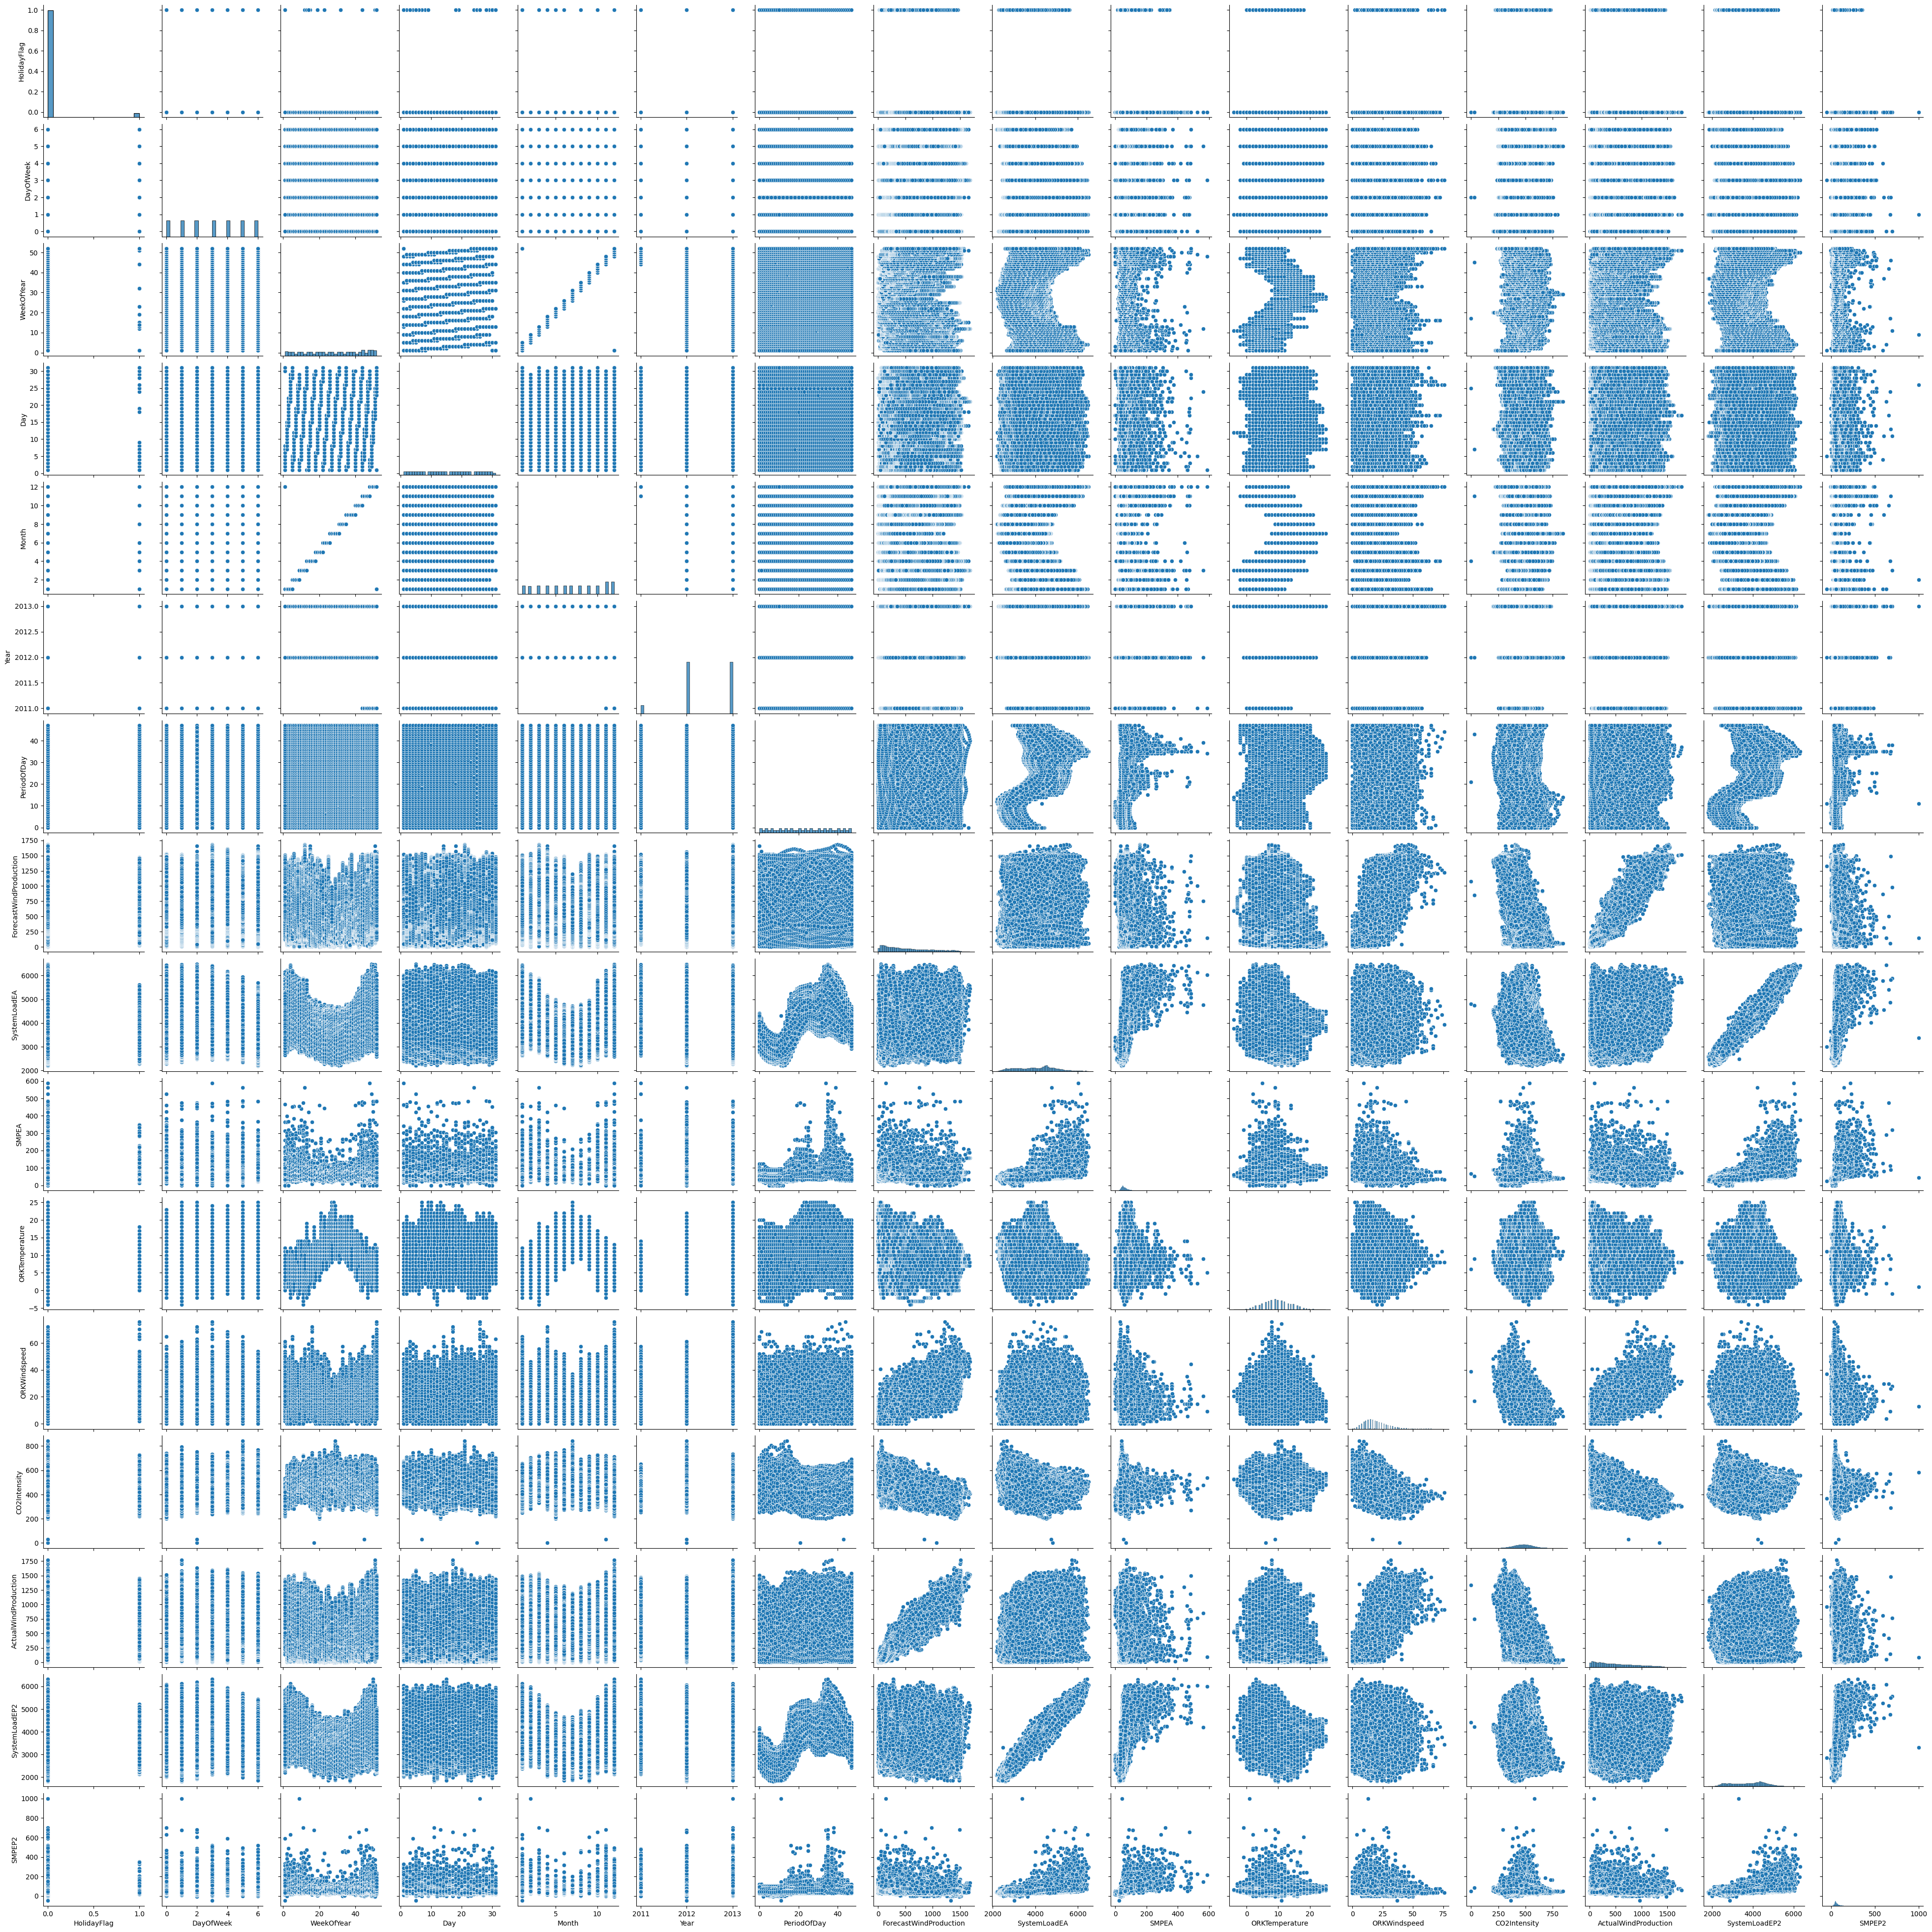

In [69]:
import seaborn as sns

sns.pairplot(data)
plt.show()

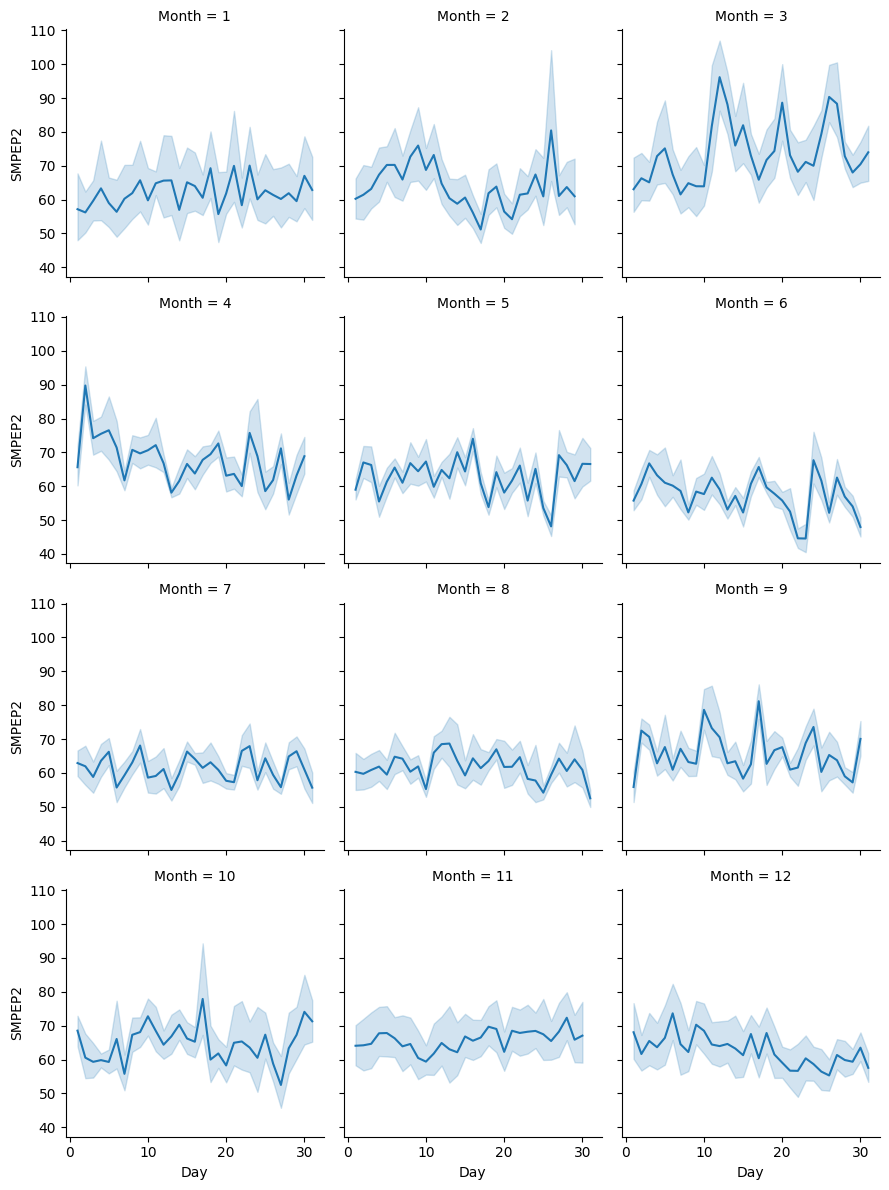

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(data, col="Month", col_wrap=3)
g.map(sns.lineplot, "Day", "SMPEP2")
g.set_axis_labels("Day", "SMPEP2")
plt.show()

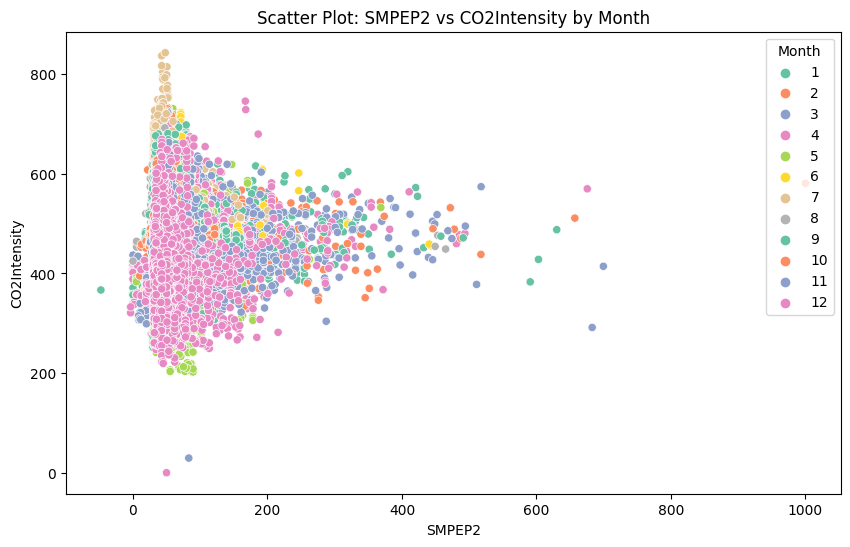

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

x = "SMPEP2"
y = "CO2Intensity"
hue = "Month"

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, hue=hue, data=data, palette="Set2")
plt.xlabel("SMPEP2")
plt.ylabel("CO2Intensity")
plt.title("Scatter Plot: SMPEP2 vs CO2Intensity by Month")
plt.legend(title="Month", loc="upper right")
plt.show()

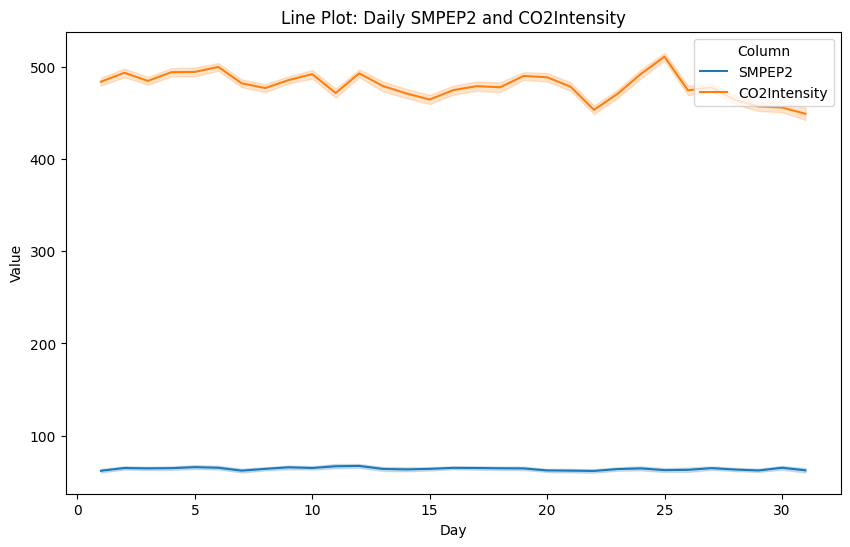

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

x = "Day"
y1 = "SMPEP2"
y2 = "CO2Intensity"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y1, data=data, label="SMPEP2")
sns.lineplot(x=x, y=y2, data=data, label="CO2Intensity")
plt.xlabel("Day")
plt.ylabel("Value")
plt.title("Line Plot: Daily SMPEP2 and CO2Intensity")
plt.legend(title="Column", loc="upper right")
plt.show()

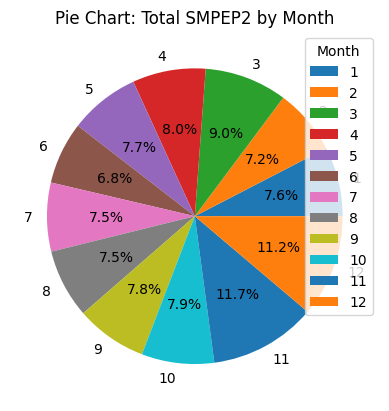

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
grouped_data = data.groupby("Month")["SMPEP2"].sum()

plt.pie(grouped_data, labels=grouped_data.index, autopct="%1.1f%%")
plt.title("Pie Chart: Total SMPEP2 by Month")
plt.legend(title="Month", loc="upper right")
plt.show()

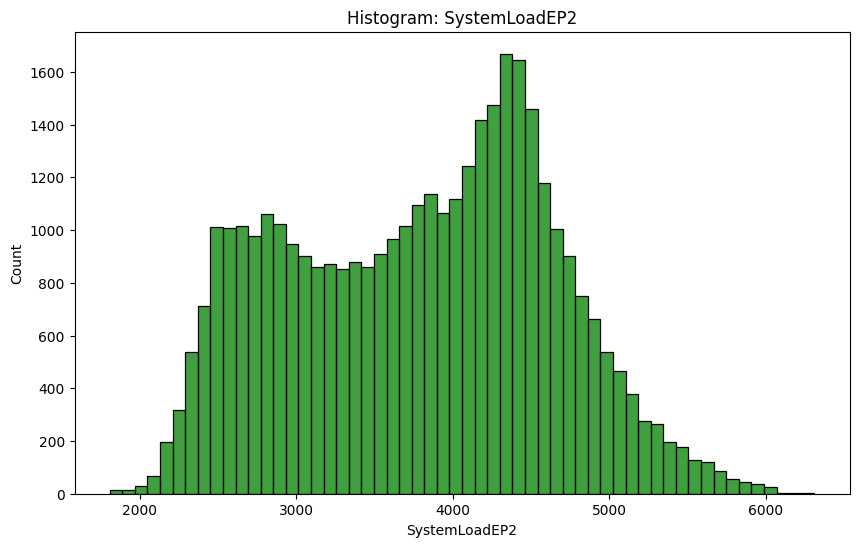

In [106]:

import matplotlib.pyplot as plt
import seaborn as sns

data_column = data["SystemLoadEP2"]

plt.figure(figsize=(10, 6))
sns.histplot(data=data_column, color='green')
plt.xlabel("SystemLoadEP2")
plt.title("Histogram: SystemLoadEP2")
plt.show()


In [107]:
x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]
y = data["SMPEP2"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [77]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                       min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_features='auto')

In [78]:
RandomForestRegressor()

RandomForestRegressor()

In [108]:
features = [["Day", "Month", "ForecastWindProduction", "SystemLoadEA", "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", "ActualWindProduction", "SystemLoadEP2"]]
features = np.array([[10, 12, 54.10, 42.05, 49.56, 9.0, 14.8, 592.32, 54.0, 4426.84]])
model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([88.1265])